In [541]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime, timedelta
import seaborn as sns

## Load Data And Explore

In [542]:
with open('ultimate_data_challenge.json') as fh:
    data = json.load(fh)

In [543]:
pprint(data[0])
print('\n')
pprint(data[0].keys())

{'avg_dist': 3.67,
 'avg_rating_by_driver': 5.0,
 'avg_rating_of_driver': 4.7,
 'avg_surge': 1.1,
 'city': "King's Landing",
 'last_trip_date': '2014-06-17',
 'phone': 'iPhone',
 'signup_date': '2014-01-25',
 'surge_pct': 15.4,
 'trips_in_first_30_days': 4,
 'ultimate_black_user': True,
 'weekday_pct': 46.2}


dict_keys(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver', 'avg_surge', 'last_trip_date', 'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'])


In [544]:
data_dict = {'avg_dist':[], 'avg_rating_by_driver':[], 'avg_rating_of_driver':[], 'avg_surge':[], 'city':[],
         'last_trip_date':[], 'phone':[], 'signup_date':[], 'surge_pct':[], 'trips_in_first_30_days':[],
         'ultimate_black_user':[], 'weekday_pct':[]}

In [545]:
for i in range(len(data)):
    data_dict['avg_dist'].append(data[i]['avg_dist'])
    data_dict['avg_rating_by_driver'].append(data[i]['avg_rating_by_driver'])
    data_dict['avg_rating_of_driver'].append(data[i]['avg_rating_of_driver'])
    data_dict['avg_surge'].append(data[i]['avg_surge'])
    data_dict['city'].append(data[i]['city'])
    data_dict['last_trip_date'].append(data[i]['last_trip_date'])
    data_dict['phone'].append(data[i]['phone'])
    data_dict['signup_date'].append(data[i]['signup_date'])
    data_dict['surge_pct'].append(data[i]['surge_pct'])
    data_dict['trips_in_first_30_days'].append(data[i]['trips_in_first_30_days'])
    data_dict['ultimate_black_user'].append(data[i]['ultimate_black_user'])
    data_dict['weekday_pct'].append(data[i]['weekday_pct'])

In [546]:
data_df = pd.DataFrame(data_dict)
data_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [547]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There's 50,000 rows of data with almost all of it complete. Only **avg_rating_by_driver**, **avg_rating_of_driver**, and **phone** coloumns contains missing data. The phone data might not require a very intelligent imputation. There's only approx 400 missing data points out of 50000. Had there been more, then there might be some insight as to maybe the app doesn't work very good on a specific type of phone(s). The ratings should and will be imputed however as ratings are usually an indication of retention.

In [548]:
data_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


The majority of numerical data is proprotional with each other. However, the rating data ranges from 0 to 5, whereas data such as distance ranges from 0 to 161. As a result, the data will have to be scaled. Also there's some non numerical data that will need to be processed

In [549]:
print(type(data_df.last_trip_date[0]))
print(type(data_df.signup_date[0]))

<class 'str'>
<class 'str'>


In [550]:
data_df.last_trip_date = data_df.last_trip_date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
data_df.signup_date = data_df.signup_date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [551]:
print(type(data_df.last_trip_date[0]))
print(type(data_df.signup_date[0]))

<class 'pandas._libs.tslib.Timestamp'>
<class 'pandas._libs.tslib.Timestamp'>


Since a user is considered active if they received a ride in the last 30 days, the "last_trip_date" column needs to be encoded into a binary response. 1 if a trip was taken in the last 30 days and 0 if the opposite is true. Since this is historical data, we  will have to use the oldest time stamp in the data, and subtract 30 days from that to give the cutoff for 0 or 1 encoding for each user

### Target Variable Encoding

In [552]:
most_recent_day = data_df.last_trip_date.max()
print('Most Recent Trip Timestamp: {}'.format(most_recent_day))
cutoff = most_recent_day - timedelta(30)
print('30 Day Retention Cutoff: {}'.format(cutoff))

Most Recent Trip Timestamp: 2014-07-01 00:00:00
30 Day Retention Cutoff: 2014-06-01 00:00:00


In [553]:
def retained(x):
    if x <= cutoff:
        return 1
    else:
        return 0

In [554]:
data_df['retained'] = data_df.last_trip_date.apply(lambda x: retained(x))

In [555]:
data_df = data_df.drop('last_trip_date', axis = 1)
data_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,Android,2014-01-29,0.0,0,False,50.0,1
2,0.77,5.0,4.3,1.00,Astapor,iPhone,2014-01-06,0.0,3,False,100.0,1
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,2014-01-10,20.0,9,True,80.0,0
4,3.13,4.9,4.4,1.19,Winterfell,Android,2014-01-27,11.8,14,False,82.4,1


### Percentage of User Retained

In [535]:
num_of_retained_users = len(data_df[data_df.retained == 1].retained)
num_of_lost_users = len(data_df[data_df.retained == 0].retained)
print('Users Retained: {}'.format(num_of_retained_users))
print('Users Lost: {}'.format(num_of_lost_users))
print('Percentage of Users Retained: {}'.format(num_of_retained_users / (num_of_retained_users + num_of_lost_users)))

Users Retained: 31690
Users Lost: 18310
Percentage of Users Retained: 0.6338


It appears that the service managed to retain 63% of the original users. Let's try to find some bivariate combination that may lend insight into the trends of a user being retained vs a user being lost

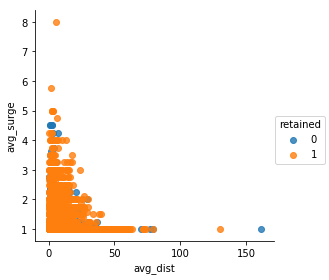

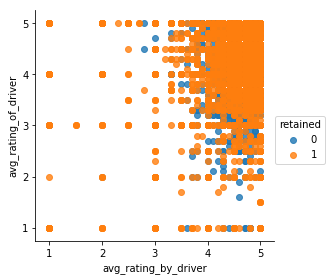

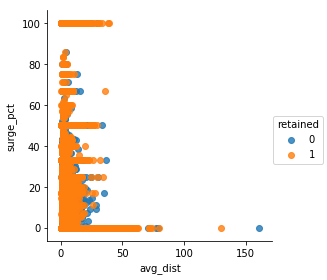

In [569]:
sns.lmplot(x='avg_dist', y='avg_surge', hue = 'retained', data=data_df, fit_reg=False, size =4)
plt.show()
sns.lmplot(x='avg_rating_by_driver', y='avg_rating_of_driver', hue='retained', data=data_df, fit_reg=False, size=4)
plt.show()
sns.lmplot(x='avg_dist', y='surge_pct', hue = 'retained', data=data_df, fit_reg=False, size =4)
plt.show()

In what would be obvious combinations to show trends, nothing is really revealed. There's too many combinations to run through right now so let's continue with the EDA

### Explore the data for users missing ratings for drivers and users
---------------------------------------------
We still need to figure out how to impute the data missing from avg_rating_of_driver (what the users rated the driver) and avg_rating_by_driver (what the drivers rated the user). Let's investigate how many users were retained from each category to get more insight on how we should fill the missing data

In [16]:
no_driver_rating = data_df[data_df.avg_rating_of_driver.isnull()]

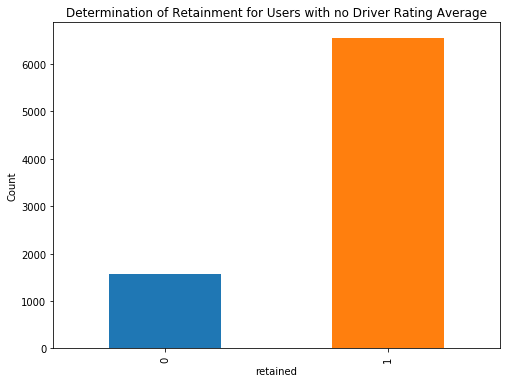

In [17]:
no_driver_rating.groupby('retained')['avg_dist'].count().plot(kind = 'bar', figsize = (8,6))
plt.ylabel('Count')
plt.title('Determination of Retainment for Users with no Driver Rating Average')
plt.show()

In [18]:
no_user_rating = data_df[data_df.avg_rating_by_driver.isnull()]

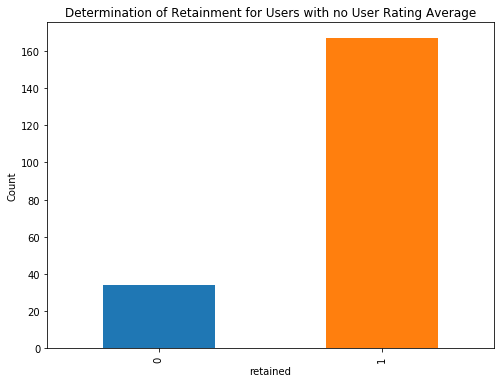

In [19]:
no_user_rating.groupby('retained')['avg_dist'].count().plot(kind = 'bar', figsize = (8,6))
plt.ylabel('Count')
plt.title('Determination of Retainment for Users with no User Rating Average')
plt.show()

In [20]:
no_rating_data = data_df[(data_df.avg_rating_by_driver.isnull()) & (data_df.avg_rating_of_driver.isnull())]

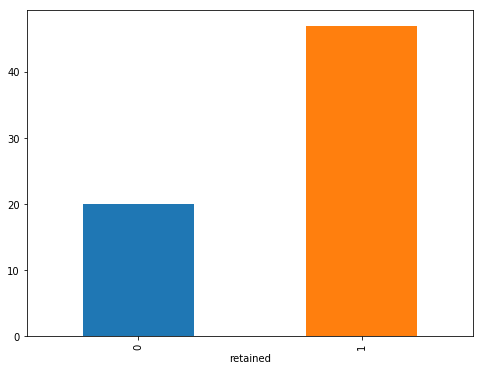

In [21]:
no_rating_data.groupby('retained')['avg_dist'].count().plot(kind = 'bar',figsize = (8,6))
plt.show()

For users who don't have an average user rating, users who don't have an average driver rating, and users who are missing both, the majority of them were retained. Because of this, it wouldn't be too aggregious to fill the data with the mean of each respective column. The averages for each column statistic is pretty high already, so no extra weighting should be necessary (such as adding one standard deviation). 

In [22]:
driver_avg_fill = data_df.avg_rating_of_driver.describe()['mean']
user_avg_fill = data_df.avg_rating_by_driver.describe()['mean']

In [23]:
print(driver_avg_fill)
print(user_avg_fill)

4.6015592912744685
4.778158195947439


In [24]:
data_df.avg_rating_by_driver = data_df.avg_rating_by_driver.fillna(driver_avg_fill)
data_df.avg_rating_of_driver = data_df.avg_rating_of_driver.fillna(user_avg_fill)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retained                  50000 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 4.2+ MB


We've already stated earlier that the phone data could probably just be dropped. However, an EDA should be performed on it before any bold moves, such as complete neglect of data, is considered

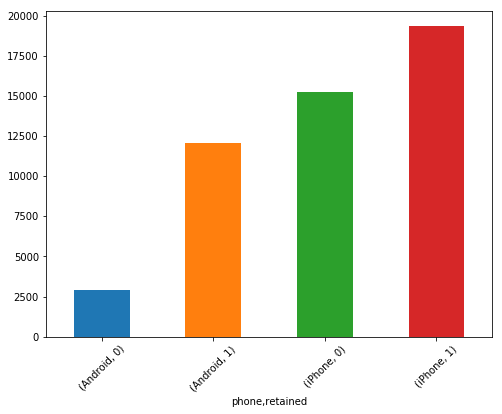

In [25]:
phone_eda = data_df.groupby(['phone','retained'])['avg_dist'].count()
phone_eda.plot(kind = 'bar', figsize = (8,6), rot = 45)
plt.show()

In [26]:
perc_android_lost = phone_eda[0] / (phone_eda[0] + phone_eda[1])
perc_iphone_lost = phone_eda[2] / (phone_eda[2] + phone_eda[3])
total_iphone = (phone_eda[2] + phone_eda[3])
total_android = (phone_eda[0] + phone_eda[1])
print('Percentage of iPhone Users Not Retained: {}'.format(perc_iphone_lost))
print('Total number of iPhone Users: {}'.format(total_iphone))
print('Percentage of Android Users Not Retained: {}'.format(perc_android_lost))
print('Total number of Android Users: {}'.format(total_android))

Percentage of iPhone Users Not Retained: 0.44063385576311376
Total number of iPhone Users: 34582
Percentage of Android Users Not Retained: 0.19584609239781653
Total number of Android Users: 15022


So iPhone users "lost percentage" is more than double that of Android users. However when comparing apples to apples, there is more than double iPhone users in total. Therefore there doesn't appear to be anything significant about a user's retainment status and the type of device they used. The phone column will be dropped altogether. While dropping insignifcant columns, there's no data indicating if there were any promotions or specials at specific dates. Therefore, it can probably be safely deduced that there is no correlation between retainment and **signup_date**. Also, the boolean type for **ultimate_black_user** needs to be encoded to 0 or 1 as well

In [27]:
#drop phone cateogry
data_df = data_df.drop(['phone','signup_date'], axis = 1)
#encode ultimate black user 1 = True | 0 = False
data_df.ultimate_black_user = data_df.ultimate_black_user.astype('category').cat.codes
data_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,15.4,4,1,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,0.0,0,0,50.0,1
2,0.77,5.0,4.3,1.00,Astapor,0.0,3,0,100.0,1
3,2.36,4.9,4.6,1.14,King's Landing,20.0,9,1,80.0,0
4,3.13,4.9,4.4,1.19,Winterfell,11.8,14,0,82.4,1


### Explore the signifcance of the cities
---------------------------------------------
The last variable we need to handle is the city variable. Just like the phone category, there may be no significance between a user's city and if they were retained or not. Before we can make this assumption, let's explore the data

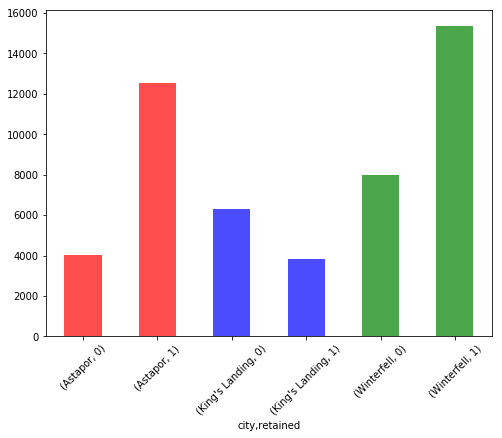

city            retained
Astapor         0            4022
                1           12512
King's Landing  0            6307
                1            3823
Winterfell      0            7981
                1           15355
Name: avg_dist, dtype: int64

In [28]:
city_retainment = data_df.groupby(['city','retained'])['avg_dist'].count()
city_retainment.plot(kind = 'bar', figsize = (8,6), rot = 45, color = ['r','r','b','b','g','g'], alpha = 0.7)
plt.show()
city_retainment

In [29]:
astapor_lost_perc = city_retainment[0] / (city_retainment[0] + city_retainment[1])
print('Astapor Lost Percentage: {}'.format(astapor_lost_perc))
kings_lost_perc = city_retainment[2] / (city_retainment[2] + city_retainment[3])
print("King's Landing Lost Percentage: {}".format(kings_lost_perc))
winter_lost_perc = city_retainment[4] / (city_retainment[4] + city_retainment[5])
print('Winterfell Lost Percentage: {}'.format(winter_lost_perc))

Astapor Lost Percentage: 0.24325632030966493
King's Landing Lost Percentage: 0.6226061204343534
Winterfell Lost Percentage: 0.34200377099760026


So there's 3 unique cities contained in the data (Astapor, King's Landing, Winterfell). Astapor represents 16,534 of the users whereas 10,130 and 23,336 are represented by King's Landing and Winterfell respectively. Interestingly enough, being the 2nd most populus of the data, King's Landing has failed to retain over 62% of their users. Further investigation is required to see if anything in the data can lend insights to this occurence

In [30]:
data_df.groupby('city')['surge_pct'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Astapor,16534.0,10.140305,21.947097,0.0,0.0,0.0,10.7,100.0
King's Landing,10130.0,9.966979,18.832035,0.0,0.0,0.0,14.3,100.0
Winterfell,23336.0,7.449927,18.832043,0.0,0.0,0.0,4.5,100.0


On average, the people in King's Landing take a ride that is surging approximately 10% of the time. This is the second highest average of the 3. However, their 75 percentile is at 14.3, which is almost 4% more than Astapor and 10% more than Winterfell. So it can be deduced that the prices seem to surge more often in King's Landing than anywhere else. Unfortunately the data can't confirm this, and there doesn't seem to be any metric in the data that can give concrete evidence for the 62% no retainment percentage. But there does seem to be signifigance between retainment and city, so that data column will be retained. It also needs to be encoded.

In [31]:
data_df.city = data_df.city.astype('category').cat.codes

* Astapor = 0
* King's Landing = 1
* Winterfell = 2

## Prepared Data

In [32]:
data_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,1,15.4,4,1,46.2,0
1,8.26,5.0,5.0,1.00,0,0.0,0,0,50.0,1
2,0.77,5.0,4.3,1.00,0,0.0,3,0,100.0,1
3,2.36,4.9,4.6,1.14,1,20.0,9,1,80.0,0
4,3.13,4.9,4.4,1.19,2,11.8,14,0,82.4,1


From a brief EDA on the data, 63% of the users were retained, but there's clearly some problems going on in King's Landing. They lost 62% of the users that signed up in their city. With no predictive model prepared, I would recommend further investigation into the problems with this city

In [33]:
x_data = data_df.drop('retained', axis = 1)
y_data = data_df.retained

# Predictive Models

There's 50,000 observations and we've created 9 unique features. With this amount of data, it's large enough for complex models such as Deep Neural Nets, and small enough for relatively simple models. We will try a few different models and compare performance. Due to the assumed extreme randomness in the data, perhaps only a DNN can learn the complexities contained within. That's where we'll start

## Tensorflow Model

In [34]:
from sklearn.model_selection import train_test_split

#### Train Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

In [305]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35000, 9)
(15000, 9)
(35000,)
(15000,)


In [36]:
data_df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'surge_pct', 'trips_in_first_30_days', 'ultimate_black_user',
       'weekday_pct', 'retained'],
      dtype='object')

In [536]:
import tensorflow as tf

#### Create Feature Columns From Pandas

In [38]:
avg_dist = tf.feature_column.numeric_column('avg_dist')
avg_rating_by_driver = tf.feature_column.numeric_column('avg_rating_by_driver')
avg_rating_of_driver = tf.feature_column.numeric_column('avg_rating_of_driver')
avg_surge = tf.feature_column.numeric_column('avg_surge')
city = tf.feature_column.numeric_column('city')
surge_pct = tf.feature_column.numeric_column('surge_pct')
trips_in_first_30_days = tf.feature_column.numeric_column('trips_in_first_30_days')
ultimate_black_user = tf.feature_column.numeric_column('ultimate_black_user')
weekday_pct = tf.feature_column.numeric_column('weekday_pct')

In [39]:
feat_cols = [avg_dist, 
             avg_rating_by_driver,
             avg_rating_of_driver,
             avg_surge,city,
             surge_pct,
             trips_in_first_30_days,
             ultimate_black_user,
             weekday_pct]

#### Create Input Function

In [40]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, 
                                                 y = y_train, 
                                                 batch_size  = 100, 
                                                 num_epochs = None, 
                                                 shuffle = True)

#### Crate Deep Neural Network Model

In [302]:
model = tf.estimator.DNNLinearCombinedClassifier(dnn_feature_columns = feat_cols, 
                                                 dnn_hidden_units=[50,40,30,20,10,1],
                                                 dnn_optimizer='Adagrad')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpzyejyz6e', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f609d1390f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### Train Model With The Input Function

In [303]:
model.train(input_fn=input_func, steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpzyejyz6e/model.ckpt.
INFO:tensorflow:loss = 83.905365, step = 1
INFO:tensorflow:global_step/sec: 368.253
INFO:tensorflow:loss = 64.52566, step = 101 (0.274 sec)
INFO:tensorflow:global_step/sec: 379.753
INFO:tensorflow:loss = 66.004684, step = 201 (0.262 sec)
INFO:tensorflow:global_step/sec: 404.8
INFO:tensorflow:loss = 63.164886, step = 301 (0.247 sec)
INFO:tensorflow:global_step/sec: 384.581
INFO:tensorflow:loss = 66.5418, step = 401 (0.261 sec)
INFO:tensorflow:global_step/sec: 448.508
INFO:tensorflow:loss = 66.13971, step = 501 (0.223 sec)
INFO:tensorflow:global_step/sec: 478.349
INFO:tensorflow:loss = 65.38837, step = 601 (0.209 sec)
INFO:tensorflow:global_step/sec: 524.111
INFO:tensorflow:loss = 

#### Create Prediction and Evaluation Input Functions

In [306]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=len(X_test), shuffle = False)

In [307]:
train_eval_fn = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=len(X_train), shuffle=False)

In [308]:
test_eval_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test, batch_size=len(X_test), shuffle = False)

#### Train Set Evaluation

In [309]:
train_eval = model.evaluate(input_fn = train_eval_fn)
train_eval

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-13-17:00:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzyejyz6e/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-13-17:00:44
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.72634286, accuracy_baseline = 0.63334286, auc = 0.76336, auc_precision_recall = 0.8319507, average_loss = 0.5699844, global_step = 10000, label/mean = 0.63334286, loss = 19949.453, precision = 0.73305196, prediction/mean = 0.68047523, recall = 0.8931745


{'accuracy': 0.72634286,
 'accuracy_baseline': 0.63334286,
 'auc': 0.76336,
 'auc_precision_recall': 0.8319507,
 'average_loss': 0.5699844,
 'global_step': 10000,
 'label/mean': 0.63334286,
 'loss': 19949.453,
 'precision': 0.73305196,
 'prediction/mean': 0.68047523,
 'recall': 0.8931745}

#### Test Set Evaluation

In [310]:
test_eval = model.evaluate(input_fn = test_eval_fn)
test_eval

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-13-17:00:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzyejyz6e/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-13-17:00:49
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.7234667, accuracy_baseline = 0.63486665, auc = 0.7518859, auc_precision_recall = 0.8212167, average_loss = 0.57597, global_step = 10000, label/mean = 0.63486665, loss = 8639.55, precision = 0.7327041, prediction/mean = 0.6807781, recall = 0.8885855


{'accuracy': 0.7234667,
 'accuracy_baseline': 0.63486665,
 'auc': 0.7518859,
 'auc_precision_recall': 0.8212167,
 'average_loss': 0.57597,
 'global_step': 10000,
 'label/mean': 0.63486665,
 'loss': 8639.55,
 'precision': 0.7327041,
 'prediction/mean': 0.6807781,
 'recall': 0.8885855}

#### Predict On Test Set

In [311]:
pred_gen = model.predict(input_fn = pred_fn)

In [312]:
predictions = list(pred_gen)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzyejyz6e/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [313]:
final_pred = [pred['class_ids'][0] for pred in predictions]

In [314]:
final_pred[0:10]

[0, 1, 1, 1, 0, 0, 1, 1, 1, 1]

In [315]:
from sklearn.metrics import classification_report

In [316]:
print(classification_report(y_test, final_pred))

             precision    recall  f1-score   support

          0       0.69      0.44      0.54      5477
          1       0.73      0.89      0.80      9523

avg / total       0.72      0.72      0.71     15000



<img src = 'cheat_sheet.png'>

In [501]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

# Linear SVM no PCA Reduction

In [375]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classify', LinearSVC(loss = 'hinge'))
])

In [391]:
param_grid = [{'classify__C':[0.01,0.1,1,10,100]}]

In [392]:
svc_clf = GridSearchCV(estimator = pipe, param_grid = param_grid, cv = 5)

In [393]:
svc_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classify', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'classify__C': [0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [401]:
print('Best Accuracy Score: {}'.format(svc_clf.best_score_))

Best Accuracy Score: 0.6646


In [502]:
svm_preds = svc_clf.predict(X_test)

In [503]:
svm_accuracy= accuracy_score(y_test, svm_preds)

In [504]:
print(classification_report(y_test, svm_preds))
print('Test Accuracy: {}'.format(svm_accuracy))

             precision    recall  f1-score   support

          0       0.68      0.14      0.23      5477
          1       0.66      0.96      0.78      9523

avg / total       0.67      0.66      0.58     15000

Test Accuracy: 0.6610666666666667


# Linear SVM with PCA, KBest & NMF Reduction

In [412]:
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

In [439]:
pca_pipe = Pipeline([
    ('scaler',StandardScaler(with_mean=False)),
    ('reduce_dim',PCA()),
    ('classify',LinearSVC())
])

In [440]:
N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [0.01,0.1,1, 10, 100, 1000]

In [441]:
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    }
]

In [442]:
svm_decomp = GridSearchCV(pca_pipe, cv=5, n_jobs=1, param_grid=param_grid)

In [443]:
svm_decomp.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=False, with_std=True)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classify', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'reduce_dim': [PCA(copy=True, iterated_power=7, n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=8, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, ver...hi2 at 0x7f60bcc76f28>)], 'reduce_dim__k': [2, 4, 8], 'classify__C': [0.01, 0.1, 1, 10, 100, 1000]}],
       pre_di

In [444]:
print('SVM with Dimensionality Reduction Best Score: {}'.format(svm_decomp.best_score_))

SVM with Dimensionality Reduction Best Score: 0.6829428571428572


In [445]:
decomp_preds = svm_decomp.predict(X_test)

In [505]:
decomp_accuracy = accuracy_score(y_test, decomp_preds)

In [506]:
print(classification_report(y_test, decomp_preds))
print('Test Accuracy: {}'.format(decomp_accuracy))

             precision    recall  f1-score   support

          0       0.66      0.26      0.37      5477
          1       0.68      0.93      0.79      9523

avg / total       0.68      0.68      0.63     15000

Test Accuracy: 0.6813333333333333


# Random Forest Classification

In [474]:
from sklearn.ensemble import RandomForestClassifier

In [475]:
param_grid = {'n_estimators':[100,200,300,400,500],
              'max_leaf_nodes':[10,15,20,25]}

In [476]:
forest_clf = RandomForestClassifier()

In [477]:
forest_cv = GridSearchCV(forest_clf, param_grid = param_grid, cv=5)

In [478]:
forest_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500], 'max_leaf_nodes': [10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [481]:
print('Best Random Forest Score: {}'.format(forest_cv.best_score_))

Best Random Forest Score: 0.7599714285714285


In [482]:
forest_preds = forest_cv.predict(X_test)

In [507]:
forest_accuracy = accuracy_score(y_test, forest_preds)

In [508]:
print(classification_report(y_test, forest_preds))
print('Test Accuracy: {}'.format(forest_accuracy))

             precision    recall  f1-score   support

          0       0.74      0.50      0.60      5477
          1       0.76      0.90      0.82      9523

avg / total       0.75      0.75      0.74     15000

Test Accuracy: 0.7534666666666666


# Gradient Boosting Classifier

In [485]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier

In [494]:
param_grids = {
               'max_depth':[1,5,10,15],
               'n_estimators':[2,3,4,5],
               }

In [495]:
boost_clf = GradientBoostingClassifier()

In [496]:
boost_cv = GridSearchCV(boost_clf, param_grid=param_grids, cv = 5)

In [497]:
boost_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10, 15], 'n_estimators': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [498]:
print('Best Boosted Gradient Score: {}'.format(boost_cv.best_score_))

Best Boosted Gradient Score: 0.7543714285714286


In [499]:
boost_pred = boost_cv.predict(X_test)

In [509]:
boost_accuracy = accuracy_score(y_test, boost_pred)

In [510]:
print(classification_report(y_test,boost_pred))
print('Test Accuracy: {}'.format(boost_accuracy))

             precision    recall  f1-score   support

          0       0.79      0.44      0.57      5477
          1       0.74      0.93      0.83      9523

avg / total       0.76      0.75      0.73     15000

Test Accuracy: 0.7524666666666666


In [538]:
model_performance_dict = {'Train Score':[
                                    svc_clf.best_score_,
                                    svm_decomp.best_score_,
                                    forest_cv.best_score_,
                                    boost_cv.best_score_,
                                    0.72634286
                                    ],
                          'Test Score':[
                                    svm_accuracy,
                                    decomp_accuracy,
                                    forest_accuracy,
                                    boost_accuracy, 
                                    0.7234667
                                    ], 
                          'Precision':[
                                    0.67, 
                                    0.68,
                                    0.75,
                                    0.76,
                                    0.72
                                    ],
                          'Recall':[
                                    0.66,
                                    0.68,
                                    0.75,
                                    0.75,
                                    0.72
                                   ],
                           'F1 Score':[
                                    0.58,
                                    0.63,
                                    0.74,
                                    0.73,
                                    0.71
                           ]
                         }
index = ['Linear_SVM','Linear_SVM_Dimension','Random_Forest','Gradient_Boosting', 'Deep Neural Network']

In [539]:
model_performance = pd.DataFrame(data = model_performance_dict, index = index)

In [540]:
model_performance

,F1 Score,Precision,Recall,Test Score,Train Score
Linear_SVM,0.58,0.67,0.66,0.661067,0.664600
Linear_SVM_Dimension,0.63,0.68,0.68,0.681333,0.682943
Random_Forest,0.74,0.75,0.75,0.753467,0.759971
Gradient_Boosting,0.73,0.76,0.75,0.752467,0.754371
Deep Neural Network,0.71,0.72,0.72,0.723467,0.726343


# Conclusion
--------------------------------

Surprisingly the DNN didn't perform as well as Random Forest and Gradient Boosting. This doesn't mean that it can't perform better. Layers can be added/removed, Neurons can be added/removed, different combinations of optimizers and layers can be trained, Scaling on the data can be performed to attenuate the curse of dimensionality. But due to to timebox constraints, not every possible combination can be investigated. With that being said, the recommendation would be made to use the Gradient Boosted model while improving the DNN. Even though the Random Forest had slightly higher Test and Train scores, that shouldn't necessarily be the deciding factor. As more data is trained on the models, the boosted model should start to perform better as it learns from previous errors and accounts for that. Also, the Random Forest might of slightly edged out the Boosted model because of the training data and how it had been shuffled. Shuffled differently, the boosted model might have performed better.  It could all be just purely circumstantial in this case, and realistically the boosted model could be performing better. And Finally, the precision of the boosted model is just slightly higher. This means it can at least predict those users who will be retained with a fair amount of accuracy. Therefore, the following discourse should be keep tuning the DNN, keep feeding the Boosted more data, and after an amount of time, revisit the performance of the two again.